# Source code

In [1]:
from collections import Counter


def replace(cnt: Counter, replace: dict) -> Counter:
    for key, value in (replace or {}).items():
        cnt[value] += cnt.pop(key, 0)
    
    return cnt


def ignore(cnt: Counter, ignore: list) -> Counter:
    for value in (ignore or []):
        del cnt[value]

    return cnt


def parse_text(text, insensetive=True) -> Counter:
    return Counter(text.upper() if insensetive else text)


def parse_file(filename: str, encoding='cp1251', *args, **kwargs) -> Counter:
    with open(filename, 'r', encoding=encoding) as file:
        text = file.read()
    
    return parse_text(text, *args, **kwargs)


def create_mapping(src: Counter, enc: Counter) -> dict:
    return {
        enc_pair[0]: src_pair[1]
        for enc_pair, src_pair in zip(
            sorted(enc.items(), key=lambda x: x[1], reverse=True),
            sorted(src.items(), key=lambda x: x[1], reverse=True)
        )
    }

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display
from typing import Callable



def cmd(function: Callable) -> Callable:
    def wrapper(self, *args, **kwargs):
        function(self, *args, **kwargs)

        self.display()
        self.show()
    return wrapper


class Application:
    source: Counter
    encrypted: Counter
    encrypted_text: str
    identity: list
    resolved: dict
    
    def __init__(self, src: Counter, enc: Counter, enct: str, ident: str = str()):
        self.source = src
        self.encrypted = enc
        self.encrypted_text = enct
        self.identity = list(ident)

        ignore(self.source, self.identity)
        ignore(self.encrypted, self.identity)

        self.resolved = dict()

    @cmd
    def straight(self, s: str) -> None:
        s = list(s)

        self.identity.extend(s)

        ignore(self.encrypted, s)
        ignore(self.source, s)
        

    @cmd
    def ignore(self, s: str) -> None:
        ignore(self.source, list(s))
    
    @cmd
    def replace(self, lhs: str, rhs: str) -> None:
        assert len(lhs) == len(rhs), "Should be equal length"

        self.resolved.update({l: r for l, r in zip(lhs, rhs)})
    
    def display(self):
        trans = {
            key: key for key in self.identity
        }

        trans.update(
            self.resolved
        )

        trans = str.maketrans(trans)

        print("Translated text:")
        print(self.encrypted_text)
        print("To:")
        print(self.encrypted_text.translate(trans))

        freq = dict(
            zip(
                sorted(self.encrypted, key=self.encrypted.get, reverse=True),
                sorted(self.source, key=self.source.get, reverse=True)
            )
        )
        
        freq.update(trans)

        freq = str.maketrans(freq)

        print("With freq:")
        print(self.encrypted_text.translate(freq))

    def show(self):
        fig, (ax1, ax2) = plt.subplots(2, 1)

        keys_e, values_e = map(
            list,
            zip(
                *sorted(self.encrypted.items(), key=lambda x: x[1], reverse=True),
            )
        )

        ax1.bar(keys_e, values_e)

        keys, values = map(
            list,
            zip(
                *sorted(self.source.items(), key=lambda x: x[1], reverse=True)
            )
        )

        ax2.bar(keys[:len(keys_e)], values[:len(values_e)])


Translated text:
1. ИТЮ ВА ЦЙНФН ЦФАКТЗ Й МЩКЩУН. ЭЩЙЩКТЮ ЩВ: «Я ОВАЮ, МСФШ МНУН. УЙН
ЦЩЙС, ФКТ БТИА Т БНФСКН ЦФКТИА ЦЙТЮТ ЭВНОУА Й ГЩНХ МЩКЩУН».
2. КАО ГНЦШН ТО ЦФКАВС ЦДКТВАГ Й ЬКЩБВСХ ЯПТЗ ОАЦДВДЮ ГАУАГ, Т ВА
ЬКЩЦШМД: «ЩФЗКЩХ!» ЩВ ЩФЙНФТЮ: «ВН ВЩХ! ВАЙЦНЭУА ФС ЩЦФАВНЫШЦЯ ФАГ».
To:
1. ИТЮ ВА ЦЙНФН ЦФАКТЗ Й МЩКЩУН. ЭЩЙЩКТЮ ЩВ: «Я ОВАЮ, МСФШ МНУН. УЙН
ЦЩЙС, ФКТ БТИА Т БНФСКН ЦФКТИА ЦЙТЮТ ЭВНОУА Й ГЩНХ МЩКЩУН».
2. КАО ГНЦШН ТО ЦФКАВС ЦДКТВАГ Й ЬКЩБВСХ ЯПТЗ ОАЦДВДЮ ГАУАГ, Т ВА
ЬКЩЦШМД: «ЩФЗКЩХ!» ЩВ ЩФЙНФТЮ: «ВН ВЩХ! ВАЙЦНЭУА ФС ЩЦФАВНЫШЦЯ ФАГ».
With freq:
EК ЬИД НО ТВАСА ТСОЛИЫ В УЕЛЕРАК БЕВЕЛИД ЕНЗ Ч. ПНОДЙ УМСЯ УАРАК РВАЖТЕВМЙ СЛИ ШИЬО И ШАСМЛА ТСЛИЬО ТВИДИ БНАПРО В ,ЕА
 УЕЛЕРАХКЖЦК ЛОП ,АТЯА ИП ТСЛОНМ ТГЛИНО, В -ЛЕШНМ
 .ЭИЫ ПОТГНГД ,ОРО,Й И НОЖ-ЛЕТЯУГЗ ЧЕСЫЛЕ
ЮХ ЕН ЕСВАСИДЗ ЧНА НЕ
Ю НОВТАБРО СМ ЕТСОНАЩЯТ. СО,ХК


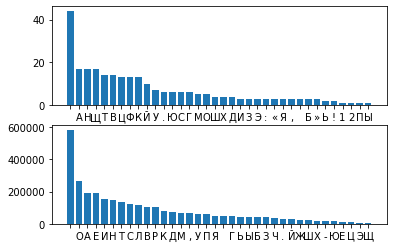

In [3]:
SOURCE_FILE = ('text.txt', 'cp1251')
TEXT = """1. ИТЮ ВА ЦЙНФН ЦФАКТЗ Й МЩКЩУН. ЭЩЙЩКТЮ ЩВ: «Я ОВАЮ, МСФШ МНУН. УЙН
ЦЩЙС, ФКТ БТИА Т БНФСКН ЦФКТИА ЦЙТЮТ ЭВНОУА Й ГЩНХ МЩКЩУН».
2. КАО ГНЦШН ТО ЦФКАВС ЦДКТВАГ Й ЬКЩБВСХ ЯПТЗ ОАЦДВДЮ ГАУАГ, Т ВА
ЬКЩЦШМД: «ЩФЗКЩХ!» ЩВ ЩФЙНФТЮ: «ВН ВЩХ! ВАЙЦНЭУА ФС ЩЦФАВНЫШЦЯ ФАГ»."""

source = parse_file(*SOURCE_FILE, insensetive=True)
encrypted = parse_text(TEXT, insensetive=True)
app = Application(source, encrypted, TEXT)
app.display()
app.show()

Translated text:
1. ИТЮ ВА ЦЙНФН ЦФАКТЗ Й МЩКЩУН. ЭЩЙЩКТЮ ЩВ: «Я ОВАЮ, МСФШ МНУН. УЙН
ЦЩЙС, ФКТ БТИА Т БНФСКН ЦФКТИА ЦЙТЮТ ЭВНОУА Й ГЩНХ МЩКЩУН».
2. КАО ГНЦШН ТО ЦФКАВС ЦДКТВАГ Й ЬКЩБВСХ ЯПТЗ ОАЦДВДЮ ГАУАГ, Т ВА
ЬКЩЦШМД: «ЩФЗКЩХ!» ЩВ ЩФЙНФТЮ: «ВН ВЩХ! ВАЙЦНЭУА ФС ЩЦФАВНЫШЦЯ ФАГ».
To:
1. ИТЮ ВА ЦЙНФН ЦФАКТЗ Й МЩКЩУН. ЭЩЙЩКТЮ ЩВ: «Я ОВАЮ, МСФШ МНУН. УЙН
ЦЩЙС, ФКТ БТИА Т БНФСКН ЦФКТИА ЦЙТЮТ ЭВНОУА Й ГЩНХ МЩКЩУН».
2. КАО ГНЦШН ТО ЦФКАВС ЦДКТВАГ Й ЬКЩБВСХ ЯПТЗ ОАЦДВДЮ ГАУАГ, Т ВА
ЬКЩЦШМД: «ЩФЗКЩХ!» ЩВ ЩФЙНФТЮ: «ВН ВЩХ! ВАЙЦНЭУА ФС ЩЦФАВНЫШЦЯ ФАГ».
With freq:
1. ЫИК НО ТВАСА ТСОЛИБ В УЕЛЕРА. ЗЕВЕЛИК ЕН: «Ч ПНОК, УДСЯ УАРА. РВА
ТЕВД, СЛИ ЙИЫО И ЙАСДЛА ТСЛИЫО ТВИКИ ЗНАПРО В МЕАГ УЕЛЕРА».
2. ЛОП МАТЯА ИП ТСЛОНД ТЬЛИНОМ В ЖЛЕЙНДГ ЧШИБ ПОТЬНЬК МОРОМ, И НО
ЖЛЕТЯУЬ: «ЕСБЛЕГ!» ЕН ЕСВАСИК: «НА НЕГ! НОВТАЗРО СД ЕТСОНАХЯТЧ СОМ».


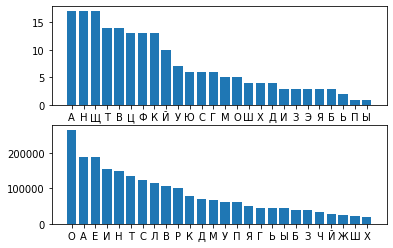

In [4]:
from string import punctuation, whitespace, digits

app.straight(str(punctuation+whitespace+digits+"«»").upper())

Translated text:
1. ИТЮ ВА ЦЙНФН ЦФАКТЗ Й МЩКЩУН. ЭЩЙЩКТЮ ЩВ: «Я ОВАЮ, МСФШ МНУН. УЙН
ЦЩЙС, ФКТ БТИА Т БНФСКН ЦФКТИА ЦЙТЮТ ЭВНОУА Й ГЩНХ МЩКЩУН».
2. КАО ГНЦШН ТО ЦФКАВС ЦДКТВАГ Й ЬКЩБВСХ ЯПТЗ ОАЦДВДЮ ГАУАГ, Т ВА
ЬКЩЦШМД: «ЩФЗКЩХ!» ЩВ ЩФЙНФТЮ: «ВН ВЩХ! ВАЙЦНЭУА ФС ЩЦФАВНЫШЦЯ ФАГ».
To:
1. ИИЛ НА ЦВЕТЕ ЦТАКИЗ В МОКОУЕ. ЭОВОКИЛ ОН: «Я ОНАЛ, МСТШ МЕУЕ. УВЕ
ЦОВС, ТКИ БИИА И БЕТСКЕ ЦТКИИА ЦВИЛИ ЭНЕОУА В ГОЕХ МОКОУЕ».
2. КАО ГЕЦШЕ ИО ЦТКАНС ЦДКИНАГ В ЬКОБНСХ ЯПИЗ ОАЦДНДЛ ГАУАГ, И НА
ЬКОЦШМД: «ОТЗКОХ!» ОН ОТВЕТИЛ: «НЕ НОХ! НАВЦЕЭУА ТС ОЦТАНЕЫШЦЯ ТАГ».
With freq:
1. ЫИЛ НО ТВЕТЕ ТТОЛИБ В УОЛОРЕ. ЗОВОЛИЛ ОН: «Ч ПНОЛ, УДТЯ УЕРЕ. РВЕ
ТОВД, ТЛИ ЙИЫО И ЙЕТДЛЕ ТТЛИЫО ТВИЛИ ЗНЕПРО В МОЕГ УОЛОРЕ».
2. ЛОП МЕТЯЕ ИП ТТЛОНД ТЬЛИНОМ В ЖЛОЙНДГ ЧШИБ ПОТЬНЬЛ МОРОМ, И НО
ЖЛОТЯУЬ: «ОТБЛОГ!» ОН ОТВЕТИЛ: «НЕ НОГ! НОВТЕЗРО ТД ОТТОНЕХЯТЧ ТОМ».


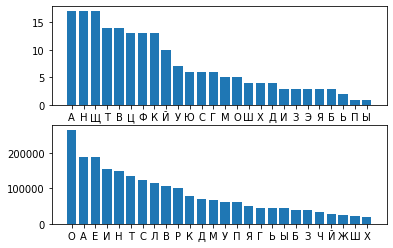

In [5]:
app.replace("ЩВ ЩФЙНФТЮ", "ОН ОТВЕТИЛ")

Translated text:
1. ИТЮ ВА ЦЙНФН ЦФАКТЗ Й МЩКЩУН. ЭЩЙЩКТЮ ЩВ: «Я ОВАЮ, МСФШ МНУН. УЙН
ЦЩЙС, ФКТ БТИА Т БНФСКН ЦФКТИА ЦЙТЮТ ЭВНОУА Й ГЩНХ МЩКЩУН».
2. КАО ГНЦШН ТО ЦФКАВС ЦДКТВАГ Й ЬКЩБВСХ ЯПТЗ ОАЦДВДЮ ГАУАГ, Т ВА
ЬКЩЦШМД: «ЩФЗКЩХ!» ЩВ ЩФЙНФТЮ: «ВН ВЩХ! ВАЙЦНЭУА ФС ЩЦФАВНЫШЦЯ ФАГ».
To:
1. ИИЛ НА ЦВЕТЕ ЦТАКИЗ В МОКОУЕ. ЭОВОКИЛ ОН: «Я ОНАЛ, МСТШ МЕУЕ. УВЕ
ЦОВС, ТКИ БИИА И БЕТСКЕ ЦТКИИА ЦВИЛИ ЭНЕОУА В ГОЕЙ МОКОУЕ».
2. КАО ГЕЦШЕ ИО ЦТКАНС ЦДКИНАГ В ЬКОБНСЙ ЯПИЗ ОАЦДНДЛ ГАУАГ, И НА
ЬКОЦШМД: «ОТЗКОЙ!» ОН ОТВЕТИЛ: «НЕ НОЙ! НАВЦЕЭУА ТС ОЦТАНЕЫШЦЯ ТАГ».
With freq:
1. ЫИЛ НО ТВЕТЕ ТТОЛИБ В УОЛОРЕ. ЗОВОЛИЛ ОН: «Ч ПНОЛ, УДТЯ УЕРЕ. РВЕ
ТОВД, ТЛИ ЙИЫО И ЙЕТДЛЕ ТТЛИЫО ТВИЛИ ЗНЕПРО В МОЕЙ УОЛОРЕ».
2. ЛОП МЕТЯЕ ИП ТТЛОНД ТЬЛИНОМ В ЖЛОЙНДЙ ЧШИБ ПОТЬНЬЛ МОРОМ, И НО
ЖЛОТЯУЬ: «ОТБЛОЙ!» ОН ОТВЕТИЛ: «НЕ НОЙ! НОВТЕЗРО ТД ОТТОНЕХЯТЧ ТОМ».


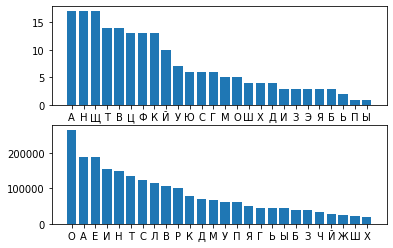

In [6]:
app.replace("ВН ВЩХ", "НЕ НОЙ")

Translated text:
1. ИТЮ ВА ЦЙНФН ЦФАКТЗ Й МЩКЩУН. ЭЩЙЩКТЮ ЩВ: «Я ОВАЮ, МСФШ МНУН. УЙН
ЦЩЙС, ФКТ БТИА Т БНФСКН ЦФКТИА ЦЙТЮТ ЭВНОУА Й ГЩНХ МЩКЩУН».
2. КАО ГНЦШН ТО ЦФКАВС ЦДКТВАГ Й ЬКЩБВСХ ЯПТЗ ОАЦДВДЮ ГАУАГ, Т ВА
ЬКЩЦШМД: «ЩФЗКЩХ!» ЩВ ЩФЙНФТЮ: «ВН ВЩХ! ВАЙЦНЭУА ФС ЩЦФАВНЫШЦЯ ФАГ».
To:
1. ИИЛ НА УВЕТЕ УТААИЗ В СЛАЛУЕ. ЭЛВЛАИЛ ЛН: «Я ОНАЛ, ССТЯ СЕУЕ. УВЕ
УЛВС, ТАИ БИИА И БЕТСАЕ УТАИИА УВИЛИ ЭНЕОУА В ГЛЕЙ СЛАЛУЕ».
2. ААО ГЕУЯЕ ИО УТААНС УЬАИНАГ В ЖАЛБНСЙ ЯПИЗ ОАУЬНЬЛ ГАУАГ, И НА
ЖАЛУЯСЬ: «ЛТЗАЛЙ!» ЛН ЛТВЕТИЛ: «НЕ НЛЙ! НАВУЕЭУА ТС ЛУТАНЕЫЯУЯ ТАГ».
With freq:
1. ЫИЛ НО УВЕТЕ УТОАИБ В СЛАЛРЕ. ЗЛВЛАИЛ ЛН: «Ч ПНОЛ, СДТЯ СЕРЕ. РВЕ
УЛВД, ТАИ ЙИЫО И ЙЕТДАЕ УТАИЫО УВИЛИ ЗНЕПРО В МЛЕЙ СЛАЛРЕ».
2. АОП МЕУЯЕ ИП УТАОНД УЬАИНОМ В ЖАЛЙНДЙ ЧШИБ ПОУЬНЬЛ МОРОМ, И НО
ЖАЛУЯСЬ: «ЛТБАЛЙ!» ЛН ЛТВЕТИЛ: «НЕ НЛЙ! НОВУЕЗРО ТД ЛУТОНЕХЯУЧ ТОМ».


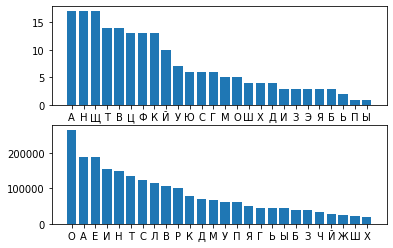

In [7]:
app.replace("ЬКЩЦШМД", "ЖАЛУЯСЬ")

Translated text:
1. ИТЮ ВА ЦЙНФН ЦФАКТЗ Й МЩКЩУН. ЭЩЙЩКТЮ ЩВ: «Я ОВАЮ, МСФШ МНУН. УЙН
ЦЩЙС, ФКТ БТИА Т БНФСКН ЦФКТИА ЦЙТЮТ ЭВНОУА Й ГЩНХ МЩКЩУН».
2. КАО ГНЦШН ТО ЦФКАВС ЦДКТВАГ Й ЬКЩБВСХ ЯПТЗ ОАЦДВДЮ ГАУАГ, Т ВА
ЬКЩЦШМД: «ЩФЗКЩХ!» ЩВ ЩФЙНФТЮ: «ВН ВЩХ! ВАЙЦНЭУА ФС ЩЦФАВНЫШЦЯ ФАГ».
To:
1. ИИЛ НА УВЕТЕ УТААИЗ В СОАОУЕ. ЭОВОАИЛ ОН: «Я ОНАЛ, ССТЯ СЕУЕ. УВЕ
УОВС, ТАИ БИИА И БЕТСАЕ УТАИИА УВИЛИ ЭНЕОУА В ГОЕЙ СОАОУЕ».
2. ААО ГЕУЯЕ ИО УТААНС УЬАИНАГ В ЖАОБНСЙ ЯПИЗ ОАУЬНЬЛ ГАУАГ, И НА
ЖАОУЯСЬ: «ОТЗАОЙ!» ОН ОТВЕТИЛ: «НЕ НОЙ! НАВУЕЭУА ТС ОУТАНЕЫЯУЯ ТАГ».
With freq:
1. ЫИЛ НО УВЕТЕ УТОАИБ В СОАОРЕ. ЗОВОАИЛ ОН: «Ч ПНОЛ, СДТЯ СЕРЕ. РВЕ
УОВД, ТАИ ЙИЫО И ЙЕТДАЕ УТАИЫО УВИЛИ ЗНЕПРО В МОЕЙ СОАОРЕ».
2. АОП МЕУЯЕ ИП УТАОНД УЬАИНОМ В ЖАОЙНДЙ ЧШИБ ПОУЬНЬЛ МОРОМ, И НО
ЖАОУЯСЬ: «ОТБАОЙ!» ОН ОТВЕТИЛ: «НЕ НОЙ! НОВУЕЗРО ТД ОУТОНЕХЯУЧ ТОМ».


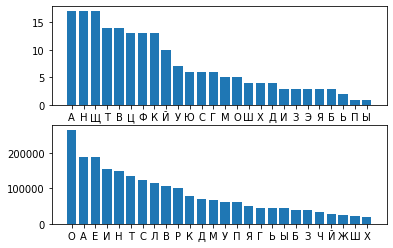

In [8]:
app.replace("ЩВ ЩФЙНФТЮ", "ОН ОТВЕТИЛ")

Translated text:
1. ИТЮ ВА ЦЙНФН ЦФАКТЗ Й МЩКЩУН. ЭЩЙЩКТЮ ЩВ: «Я ОВАЮ, МСФШ МНУН. УЙН
ЦЩЙС, ФКТ БТИА Т БНФСКН ЦФКТИА ЦЙТЮТ ЭВНОУА Й ГЩНХ МЩКЩУН».
2. КАО ГНЦШН ТО ЦФКАВС ЦДКТВАГ Й ЬКЩБВСХ ЯПТЗ ОАЦДВДЮ ГАУАГ, Т ВА
ЬКЩЦШМД: «ЩФЗКЩХ!» ЩВ ЩФЙНФТЮ: «ВН ВЩХ! ВАЙЦНЭУА ФС ЩЦФАВНЫШЦЯ ФАГ».
To:
1. ИИЛ НА СВЕТЕ СТАРИК В БОРОУЕ. ЭОВОРИЛ ОН: «Я ОНАЛ, БСТЬ БЕУЕ. УВЕ
СОВС, ТРИ БИИА И БЕТСРЕ СТРИИА СВИЛИ ЭНЕОУА В ГОЕЙ БОРОУЕ».
2. РАО ГЕСЬЕ ИО СТРАНС СУРИНАГ В ПРОБНСЙ ЯПИК ОАСУНУЛ ГАУАГ, И НА
ПРОСЬБУ: «ОТКРОЙ!» ОН ОТВЕТИЛ: «НЕ НОЙ! НАВСЕЭУА ТС ОСТАНЕЫЬСЯ ТАГ».
With freq:
1. ЫИЛ НА СВЕТЕ СТАРИК В БОРОРЕ. ЗОВОРИЛ ОН: «Ч ПНАЛ, БДТЬ БЕРЕ. РВЕ
СОВД, ТРИ ЙИЫА И ЙЕТДРЕ СТРИЫА СВИЛИ ЗНЕПРА В МОЕЙ БОРОРЕ».
2. РАП МЕСЬЕ ИП СТРАНД СУРИНАМ В ПРОЙНДЙ ЧШИК ПАСУНУЛ МАРАМ, И НА
ПРОСЬБУ: «ОТКРОЙ!» ОН ОТВЕТИЛ: «НЕ НОЙ! НАВСЕЗРА ТД ОСТАНЕХЬСЧ ТАМ».


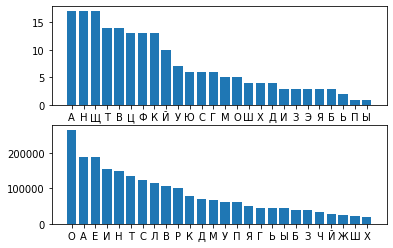

In [9]:
app.replace("Т ВА ЬКЩЦШМД: «ЩФЗКЩХ!»", "И НА ПРОСЬБУ: «ОТКРОЙ!»")

Translated text:
1. ИТЮ ВА ЦЙНФН ЦФАКТЗ Й МЩКЩУН. ЭЩЙЩКТЮ ЩВ: «Я ОВАЮ, МСФШ МНУН. УЙН
ЦЩЙС, ФКТ БТИА Т БНФСКН ЦФКТИА ЦЙТЮТ ЭВНОУА Й ГЩНХ МЩКЩУН».
2. КАО ГНЦШН ТО ЦФКАВС ЦДКТВАГ Й ЬКЩБВСХ ЯПТЗ ОАЦДВДЮ ГАУАГ, Т ВА
ЬКЩЦШМД: «ЩФЗКЩХ!» ЩВ ЩФЙНФТЮ: «ВН ВЩХ! ВАЙЦНЭУА ФС ЩЦФАВНЫШЦЯ ФАГ».
To:
1. ИИЛ НА СВЕТЕ СТАРИК В БОРОДЕ. ГОВОРИЛ ОН: «Я ОНАЛ, БЫТЬ БЕДЕ. ДВЕ
СОВЫ, ТРИ БИИА И БЕТЫРЕ СТРИИА СВИЛИ ГНЕОДА В МОЕЙ БОРОДЕ».
2. РАО МЕСЬЕ ИО СТРАНЫ СУРИНАМ В ПРОБНЫЙ ЯПИК ОАСУНУЛ МАДАМ, И НА
ПРОСЬБУ: «ОТКРОЙ!» ОН ОТВЕТИЛ: «НЕ НОЙ! НАВСЕГДА ТЫ ОСТАНЕШЬСЯ ТАМ».
With freq:
1. ЫИЛ НА СВЕТЕ СТАРИК В БОРОДЕ. ГОВОРИЛ ОН: «Я ПНАЛ, БЫТЬ БЕДЕ. ДВЕ
СОВЫ, ТРИ ЙИЫА И ЙЕТЫРЕ СТРИЫА СВИЛИ ГНЕПДА В МОЕЙ БОРОДЕ».
2. РАП МЕСЬЕ ИП СТРАНЫ СУРИНАМ В ПРОЙНЫЙ ЯШИК ПАСУНУЛ МАДАМ, И НА
ПРОСЬБУ: «ОТКРОЙ!» ОН ОТВЕТИЛ: «НЕ НОЙ! НАВСЕГДА ТЫ ОСТАНЕШЬСЯ ТАМ».


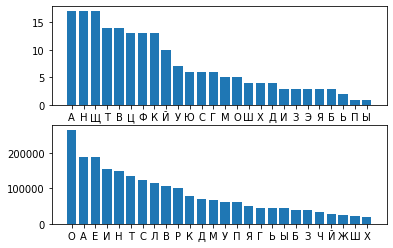

In [10]:
app.replace("ВАЙЦНЭУА ФС ЩЦФАВНЫШЦЯ ФАГ", "НАВСЕГДА ТЫ ОСТАНЕШЬСЯ ТАМ")

Translated text:
1. ИТЮ ВА ЦЙНФН ЦФАКТЗ Й МЩКЩУН. ЭЩЙЩКТЮ ЩВ: «Я ОВАЮ, МСФШ МНУН. УЙН
ЦЩЙС, ФКТ БТИА Т БНФСКН ЦФКТИА ЦЙТЮТ ЭВНОУА Й ГЩНХ МЩКЩУН».
2. КАО ГНЦШН ТО ЦФКАВС ЦДКТВАГ Й ЬКЩБВСХ ЯПТЗ ОАЦДВДЮ ГАУАГ, Т ВА
ЬКЩЦШМД: «ЩФЗКЩХ!» ЩВ ЩФЙНФТЮ: «ВН ВЩХ! ВАЙЦНЭУА ФС ЩЦФАВНЫШЦЯ ФАГ».
To:
1. БЫЛ НА СВЕТЕ СТАРЫК В БОРОДЕ. ГОВОРЫЛ ОН: «Я ОНАЛ, БЫТЬ БЕДЕ. ДВЕ
СОВЫ, ТРЫ БЫБА Ы БЕТЫРЕ СТРЫБА СВЫЛЫ ГНЕОДА В МОЕЙ БОРОДЕ».
2. РАО МЕСЬЕ ЫО СТРАНЫ СУРЫНАМ В ПРОБНЫЙ ЯПЫК ОАСУНУЛ МАДАМ, Ы НА
ПРОСЬБУ: «ОТКРОЙ!» ОН ОТВЕТЫЛ: «НЕ НОЙ! НАВСЕГДА ТЫ ОСТАНЕШЬСЯ ТАМ».
With freq:
1. БЫЛ НА СВЕТЕ СТАРЫК В БОРОДЕ. ГОВОРЫЛ ОН: «Я ПНАЛ, БЫТЬ БЕДЕ. ДВЕ
СОВЫ, ТРЫ ЙЫБА Ы ЙЕТЫРЕ СТРЫБА СВЫЛЫ ГНЕПДА В МОЕЙ БОРОДЕ».
2. РАП МЕСЬЕ ЫП СТРАНЫ СУРЫНАМ В ПРОЙНЫЙ ЯШЫК ПАСУНУЛ МАДАМ, Ы НА
ПРОСЬБУ: «ОТКРОЙ!» ОН ОТВЕТЫЛ: «НЕ НОЙ! НАВСЕГДА ТЫ ОСТАНЕШЬСЯ ТАМ».


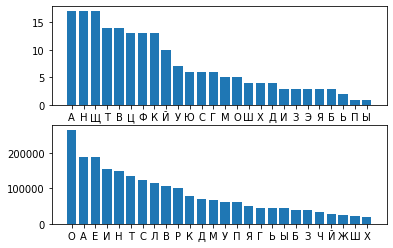

In [11]:
app.replace("ИТЮ ВА", "БЫЛ НА")

Translated text:
1. ИТЮ ВА ЦЙНФН ЦФАКТЗ Й МЩКЩУН. ЭЩЙЩКТЮ ЩВ: «Я ОВАЮ, МСФШ МНУН. УЙН
ЦЩЙС, ФКТ БТИА Т БНФСКН ЦФКТИА ЦЙТЮТ ЭВНОУА Й ГЩНХ МЩКЩУН».
2. КАО ГНЦШН ТО ЦФКАВС ЦДКТВАГ Й ЬКЩБВСХ ЯПТЗ ОАЦДВДЮ ГАУАГ, Т ВА
ЬКЩЦШМД: «ЩФЗКЩХ!» ЩВ ЩФЙНФТЮ: «ВН ВЩХ! ВАЙЦНЭУА ФС ЩЦФАВНЫШЦЯ ФАГ».
To:
1. БИЛ НА СВЕТЕ СТАРИК В БОРОДЕ. ГОВОРИЛ ОН: «Я ОНАЛ, БЫТЬ БЕДЕ. ДВЕ
СОВЫ, ТРИ БИБА И БЕТЫРЕ СТРИБА СВИЛИ ГНЕОДА В МОЕЙ БОРОДЕ».
2. РАО МЕСЬЕ ИО СТРАНЫ СУРИНАМ В ПРОБНЫЙ ЯПИК ОАСУНУЛ МАДАМ, И НА
ПРОСЬБУ: «ОТКРОЙ!» ОН ОТВЕТИЛ: «НЕ НОЙ! НАВСЕГДА ТЫ ОСТАНЕШЬСЯ ТАМ».
With freq:
1. БИЛ НА СВЕТЕ СТАРИК В БОРОДЕ. ГОВОРИЛ ОН: «Я ПНАЛ, БЫТЬ БЕДЕ. ДВЕ
СОВЫ, ТРИ ЙИБА И ЙЕТЫРЕ СТРИБА СВИЛИ ГНЕПДА В МОЕЙ БОРОДЕ».
2. РАП МЕСЬЕ ИП СТРАНЫ СУРИНАМ В ПРОЙНЫЙ ЯШИК ПАСУНУЛ МАДАМ, И НА
ПРОСЬБУ: «ОТКРОЙ!» ОН ОТВЕТИЛ: «НЕ НОЙ! НАВСЕГДА ТЫ ОСТАНЕШЬСЯ ТАМ».


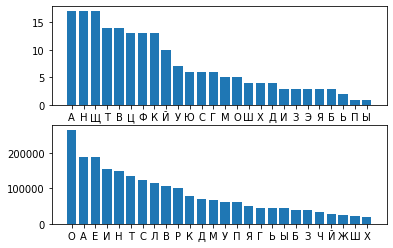

In [12]:
app.replace("ЦФАКТЗ", "СТАРИК")